In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Github/TFG/source

# !git pull https://github.com/ZhihaoDC/TFG

Mounted at /gdrive
/gdrive/My Drive/Github/TFG/source


In [2]:
#Import custom python files
import girvan_newman as girvan_newman
import louvain as louvain

In [3]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
def running_time(start_time, end_time):
  running_time = end_time - start_time
  running_time_minutes = running_time // 60
  running_time_seconds = running_time % 60

  return (running_time_minutes, running_time_seconds)

#Zachary's karate club

In [5]:
#Read Graph
karate = nx.karate_club_graph()
pos_karate = nx.spring_layout(karate) #layout for karate graph
print(nx.info(karate))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


Running time: 0.0min 0.4087660312652588s
Modularity: 0.39718934911242604
Number of communities: 5


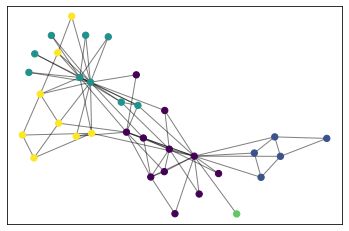

In [6]:
#Girvan Newman Algorithm
start_time = time.time()
GN_karate_dendrogram, GN_karate_modularity = girvan_newman.Girvan_Newman_2004(karate)
end_time = time.time()
min, sec = running_time(start_time, end_time)

GN_karate_running_time = end_time - start_time
GN_karate_num_comms = len(GN_karate_dendrogram)

print('Running time: ', min,'min ', sec,'s', sep='')
print('Modularity:', GN_karate_modularity)
print('Number of communities:', GN_karate_num_comms)
#Plot Girvan Newman communities
GN_communities = girvan_newman.dendrogram_to_community(GN_karate_dendrogram)
girvan_newman.draw_communities_fixed_pos(karate, GN_communities, pos_karate)

#Computed parameters for later analysis
#GN_karate_num_comms
#GN_karate_running_time 
#GN_karate_modularity

Running time: 0.0min 0.011521100997924805s
Modularity: 0.4155982905982906
Number of communities: 4


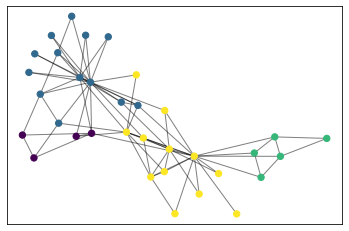

In [7]:
#Louvain method
start_time = time.time()
LV_supergraph, LV_communities = louvain.Louvain(karate)
end_time = time.time()
min, sec = running_time(start_time, end_time)

LV_karate_running_time = end_time - start_time
LV_last_community_karate = louvain.last_community(karate, LV_communities)
LV_karate_modularity = nx.algorithms.community.quality.modularity(karate,louvain.dendrogram(LV_last_community_karate))
LV_karate_num_comms = len(set(LV_last_community_karate.values()))

print('Running time: ', min,'min ', sec,'s', sep='')
print('Modularity:', LV_karate_modularity)
print('Number of communities:', LV_karate_num_comms)

louvain.draw_communities_fixed_pos(karate, LV_last_community_karate, pos_karate)

#Computed parameters for later analysis
#LV_karate_num_comms
#LV_karate_running_time
#LV_karate_modularity

#Game of Thrones (Book 1)

In [31]:
got = pd.read_csv('../datasets/game-of-thrones-books/book1.csv')

In [32]:
got = got[['Source','Target','weight']]

In [33]:
got_graph = nx.from_pandas_edgelist(got, source='Source', target='Target', edge_attr='weight')
got_graph = got_graph.to_undirected(got_graph)
print(nx.info(got_graph))

Name: 
Type: Graph
Number of nodes: 187
Number of edges: 684
Average degree:   7.3155


In [34]:
#Girvan-Newman
# start_time = time.time()
# GN_got_dendrogram, GN_got_modularity = girvan_newman.Girvan_Newman_2004(got_graph)
# end_time = time.time()
# min, sec = running_time(start_time, end_time)

# GN_got_num_comms = len(GN_got_dendrogram)
# GN_got_running_time = end_time - start_time


# print('Running time: ', min,'min ', sec,'s', sep='')
# print('Modularity:', GN_got_modularity)
# print('Number of communities:', GN_got_num_comms)
#Plot Girvan Newman communities
# GN_communities = girvan_newman.dendrogram_to_community(GN_got_dendrogram)

#Computed parameters for later analysis
GN_got_num_comms = np.NaN
GN_got_running_time = 19800 #>5h 30min
GN_got_modularity = np.NaN

In [35]:
got_GN = got_graph.copy()
nx.set_node_attributes(got_GN, GN_communities, 'community')
nx.write_gexf(got_GN, "GN_got.gexf", version="1.2draft")

In [36]:
# Louvain method
start_time = time.time()
LV_supergraph, LV_communities = louvain.Louvain(got_graph)
end_time = time.time()
min, sec = running_time(start_time, end_time)

LV_got_running_time = end_time - start_time
LV_last_community_got = louvain.last_community(got_graph, LV_communities)
LV_got_modularity = nx.algorithms.community.quality.modularity(got_graph,louvain.dendrogram(LV_last_community_got))
LV_got_num_comms = len(set(LV_last_community_got.values()))

print('Running time: ', min,'min ', sec,'s', sep='')
print('Modularity:', LV_got_modularity)
print('Number of communities:', LV_got_num_comms)

#Computed parameters for later analysis
#LV_got_num_comms
#LV_got_running_time 
#LV_got_modularity

Running time: 0.0min 0.1434032917022705s
Modularity: 0.40790436337115243
Number of communities: 25


In [37]:
#Save communities for graphic representation
got_LV = got_graph.copy()
nx.set_node_attributes(got_LV, LV_last_community_got, 'community')
# marvel_LV.remove_nodes_from(nodes_to_delete)
nx.write_gexf(got_LV, "louvain_got.gexf", version="1.2draft")

#Marvel Comics Social Network

In [8]:
nodes = pd.read_csv('../datasets/marvel-social-network/nodes.csv') #Node name and type
edges = pd.read_csv('../datasets/marvel-social-network/edges.csv') #Heroes and the comic in which they appear
heroes = pd.read_csv('../datasets/marvel-social-network/hero-network.csv') # Edges between heroes that appear in the same comic

In [9]:
heroes.head(10)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
5,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
6,"STEELE, SIMON/WOLFGA","FORTUNE, DOMINIC"
7,"STEELE, SIMON/WOLFGA","ERWIN, CLYTEMNESTRA"
8,"STEELE, SIMON/WOLFGA",IRON MAN/TONY STARK
9,"STEELE, SIMON/WOLFGA",IRON MAN IV/JAMES R.


In [10]:
#Remove leading and trailing spaces

nodes = nodes.applymap(lambda x: x.strip())
edges = edges.applymap(lambda x: x.strip())
heroes = heroes.applymap(lambda x: x.strip())

In [11]:
heroes.loc[ heroes['hero2']==' ' ].shape[0]

0

In [12]:
#Number of times IronMan/TonyStark has appeared in another hero's comic
heroes.loc[ heroes['hero1']=='IRON MAN/TONY STARK' ].shape[0]

5850

In [13]:
# Number of times Spiderman/PeterParker appeared in the same comic as IronMan/TonyStark
heroes.loc[ (heroes['hero1']=='SPIDER-MAN/PETER PAR') & (heroes['hero2']=='IRON MAN/TONY STARK') ].shape[0]

40

In [14]:
# Number of times IronMan/TonyStark appeared in the same comic as Spiderman/PeterParker
heroes.loc[ (heroes['hero1'] == 'IRON MAN/TONY STARK') & (heroes['hero2'] == 'SPIDER-MAN/PETER PAR') ].shape[0]

54

These two values may be different because of the structure of the edgelist. Maybe a relationship of (hero1=Spiderman, hero2=Ironman) indicates an occurence of Spiderman appearing in an Ironman comic.

In [15]:
#Number different comics in which IronMan/TonyStark has appeared in 
ironman_h1 = heroes.loc[heroes['hero1'] == 'IRON MAN/TONY STARK'].drop_duplicates()
ironman_h1.shape[0]

1131

In [16]:
#Number different heroes that have appeared in a IronMan/TonyStark comic
ironman_h2 = heroes.loc[heroes['hero2'] == 'IRON MAN/TONY STARK'].drop_duplicates()
ironman_h2.shape[0]

1106

In [17]:
#Number of times IronMan has been involved in his or other heroes' comics
ironman_merge = pd.merge(ironman_h1, ironman_h2, how='outer', left_on='hero2', right_on='hero1')
ironman_merge.shape[0]

1521

Since we are interested in a non directed graph, we will ignore this fact for the moment

In [18]:
heroes = heroes.drop_duplicates()

In [19]:
#Generate graph
marvel = nx.from_pandas_edgelist(heroes, source='hero1', target='hero2') 
marvel = marvel.to_undirected(marvel) # Unweighted undirected graph

print(nx.info(marvel))

Name: 
Type: Graph
Number of nodes: 6421
Number of edges: 167112
Average degree:  52.0517


In [20]:
#Check graph generation

# #Previously seen:
# #Number of times IronMan has been involved in his or other heroes' comics
# ironman_merge = pd.merge(ironman_h1, ironman_h2, how='outer', left_on='hero2', right_on='hero1')
# ironman_merge.shape[0] 
# #Out: 1521

len(list(marvel.edges('IRON MAN/TONY STARK')))

1521

The graph density of simple graphs is defined to be the ratio of the number of edges  |E|  with respect to the maximum possible edges For undirected simple graphs, the graph density is:

${\displaystyle D={\frac {|E|}{\binom {|V|}{2}}}={\frac {2|E|}{|V|(|V|-1)}}}$

where E is the number of edges and V is the number of vertices in the graph.

The maximum number of edges for an undirected graph is ${\displaystyle {\binom {|V|}{2}}={\frac{|V|(|V|-1)}{2}}}$ , so the maximal density is 1 (for complete graphs) and the minimal density is 0

In [21]:
def graph_density(n_vertex, n_edges):
  return (2*n_edges / (n_vertex * (n_vertex - 1)) )

In [22]:
density = graph_density(marvel.number_of_nodes(), marvel.number_of_edges())
print(density)

0.008107742265085212


In [23]:
heroes_community = heroes['hero1'].drop_duplicates()
heroes_community = heroes_community.to_frame(name='heroes')
heroes_community = heroes_community.set_index(np.arange(len(heroes_community)))

In [24]:
# #Girvan-Newman
# start_time = time.time()
# GN_marvel_dendrogram, GN_marvel_modularity = girvan_newman.Girvan_Newman_2004(marvel)
# end_time = time.time()
# min, sec = running_time(start_time, end_time)
# GN_marvel_running_time = end_time - start_time
# GN_marvel_num_comms = len(GN_marvel_dendrogram)

# print('Running time: ', min,'min ', sec,'s', sep='')
# print('Modularity:', GN_modularity)
# #Plot Girvan Newman communities
# GN_communities = girvan_newman.dendrogram_to_community(GN_marvel_dendrogram)

#Computed parameters for later analysis
GN_marvel_num_comms = np.NaN
GN_marvel_running_time = 21600
GN_marvel_modularity = np.NaN
# GN_marvel_num_comms 
# GN_marvel_running_time
# GN_marvel_modularity

In [25]:
# marvel_GN = marvel.copy()
# nx.set_node_attributes(marvel_GN, GN_communities, 'community')
# nx.write_gexf(marvel_GN, "GN_marvel.gexf", version="1.2draft")

In [26]:
#Louvain method
start_time = time.time()
LV_supergraph, LV_communities = louvain.Louvain(marvel)
end_time = time.time()
min, sec = running_time(start_time, end_time)

LV_marvel_running_time = end_time - start_time
LV_last_community_marvel = louvain.last_community(marvel, LV_communities)
LV_marvel_modularity = nx.algorithms.community.quality.modularity(marvel,louvain.dendrogram(LV_last_community_marvel))
LV_marvel_num_comms = len(set(LV_last_community_marvel.values()))


print('Number of communities:', LV_marvel_num_comms)
print('Running time: ', min,'min ', sec,'s', sep='')
print('Modularity:', LV_marvel_modularity)
# louvain.draw_communities_fixed_pos(karate, LV_last_community, pos_karate)

#Computed parameters for later analysis
# LV_marvel_num_comms
# LV_marvel_running_time
# LV_marvel_modularity

Number of communities: 199
Running time: 7.0min 22.58596158027649s
Modularity: 0.3904286220040676


In [27]:
heroes_community = heroes['hero1'].drop_duplicates()
heroes_community = heroes_community.to_frame(name='heroes')
heroes_community = heroes_community.set_index(np.arange(len(heroes_community)))

In [28]:
#Delete communities that represent less than 2%
heroes_community['community'] = heroes_community['heroes'].apply(lambda x: LV_last_community_marvel[x])
heroes_comunity_count = heroes_community['community'].value_counts(normalize=True)
communities_001 = heroes_comunity_count < 0.02
communities_001 = list(communities_001[communities_001 == True].index)
nodes_to_delete = heroes_community[heroes_community.community.isin(communities_001)]
nodes_to_delete = nodes_to_delete['heroes']

In [29]:
#Save communities for graphic representation
marvel_LV = marvel.copy()
nx.set_node_attributes(marvel_LV, LV_last_community_marvel, 'community')
marvel_LV.remove_nodes_from(nodes_to_delete)
nx.write_gexf(marvel_LV, "louvain_marvel002.gexf", version="1.2draft")

In [30]:
# import community as community_louvain
# best_partition = community_louvain.best_partition(marvel)
# nx.algorithms.community.quality.modularity(marvel,louvain.dendrogram(best_partition))
# marvel_LV_nx = marvel.copy()
# nx.set_node_attributes(marvel_LV_nx, best_partition, 'community')
# nx.write_gexf(marvel_LV, "louvain_marvel_nx.gexf", version="1.2draft")

#Facebook

In [41]:
facebook = pd.read_csv('../datasets/facebook/socfb-Haverford76.txt', sep=' ', names=['person1','person2'])

In [42]:
facebook = nx.from_pandas_edgelist(facebook, source='person1', target='person2')

In [44]:
#Girvan-Newman
# start_time = time.time()
# GN_fb_dendrogram, GN_fb_modularity = girvan_newman.Girvan_Newman_2004(facebook)
# end_time = time.time()
# min, sec = running_time(start_time, end_time)

# GN_fb_num_comms = len(GN_fb_dendrogram)
# GN_fb_running_time = end_time - start_time

#Computed parameters for later analysis
GN_fb_num_comms = np.NaN
GN_fb_running_time = 19800 #>5h 30 min
GN_fb_modularity = np.NaN

print('Running time: ', min,'min ', sec,'s', sep='')
print('Modularity:', GN_fb_modularity)
print('Number of communities:', GN_fb_num_comms)
#Plot Girvan Newman communities
# GN_communities = girvan_newman.dendrogram_to_community(GN_fb_dendrogram)



Running time: 0.0min 0.1434032917022705s
Modularity: nan
Number of communities: nan


In [45]:
# Louvain method
start_time = time.time()
LV_supergraph, LV_communities = louvain.Louvain(facebook)
end_time = time.time()
min, sec = running_time(start_time, end_time)

LV_fb_running_time = end_time - start_time
LV_last_community_fb = louvain.last_community(facebook, LV_communities)
LV_fb_modularity = nx.algorithms.community.quality.modularity(facebook,louvain.dendrogram(LV_last_community_fb))
LV_fb_num_comms = len(set(LV_last_community_fb.values()))

print('Running time: ', min,'min ', sec,'s', sep='')
print('Modularity:', LV_fb_modularity)
print('Number of communities:', LV_fb_num_comms)

#Computed parameters for later analysis
#LV_fb_num_comms
#LV_fb_running_time 
#LV_fb_modularity

Running time: 1.0min 29.208226442337036s
Modularity: 0.3076820683748825
Number of communities: 4


#Results comparison

In [49]:
GN_num_comms = pd.Series({'Karate':GN_karate_num_comms, 'GoT':GN_got_num_comms, 'Facebook':GN_fb_num_comms,'Marvel':GN_marvel_num_comms}, index = ['Karate','GoT','Facebook','Marvel'])
LV_num_comms = pd.Series({'Karate':LV_karate_num_comms, 'GoT':LV_got_num_comms, 'Facebook':LV_fb_num_comms,'Marvel':LV_marvel_num_comms}, index = ['Karate','GoT','Facebook','Marvel'])

GN_running_time = pd.Series({'Karate':GN_karate_running_time, 'GoT':GN_got_running_time, 'Facebook':GN_fb_running_time, 'Marvel':GN_marvel_running_time}, index = ['Karate','GoT','Facebook','Marvel'])
LV_running_time = pd.Series({'Karate':LV_karate_running_time, 'GoT':LV_got_running_time, 'Facebook':LV_fb_running_time, 'Marvel':LV_marvel_running_time}, index = ['Karate','GoT','Facebook','Marvel'])

GN_modularity = pd.Series({'Karate':GN_karate_modularity, 'GoT':GN_got_modularity, 'Facebook':GN_fb_modularity, 'Marvel':GN_marvel_modularity}, index = ['Karate','GoT','Facebook','Marvel'])
LV_modularity = pd.Series({'Karate':LV_karate_modularity, 'GoT':LV_got_modularity, 'Facebook':LV_fb_modularity, 'Marvel':LV_marvel_modularity}, index = ['Karate','GoT','Facebook','Marvel'])

num_nodes = [karate.number_of_nodes(), got_graph.number_of_nodes(), facebook.number_of_nodes(), marvel.number_of_nodes()]
num_edges = [karate.number_of_edges(), got_graph.number_of_edges(), facebook.number_of_edges(), marvel.number_of_edges()]

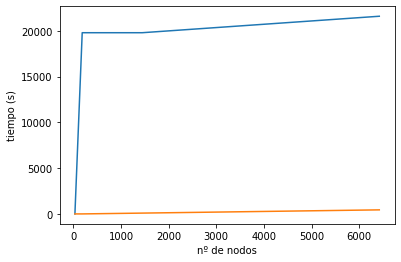

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(num_nodes, GN_running_time, color='tab:blue')
ax.plot(num_nodes, LV_running_time, color='tab:orange')
plt.xlabel('nº de nodos')
plt.ylabel('tiempo (s)')
plt.show()